<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Basic-idea" data-toc-modified-id="Basic-idea-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Basic idea</a></span></li><li><span><a href="#Requirements-and-Setup" data-toc-modified-id="Requirements-and-Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Requirements and Setup</a></span></li><li><span><a href="#Input-(Please-Specify)" data-toc-modified-id="Input-(Please-Specify)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Input (Please Specify)</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Extract-Data-and-Normalization" data-toc-modified-id="Extract-Data-and-Normalization-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Extract Data and Normalization</a></span></li><li><span><a href="#Compute-Distance-Matrix" data-toc-modified-id="Compute-Distance-Matrix-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Compute Distance Matrix</a></span></li></ul></li><li><span><a href="#Choose-Parameter" data-toc-modified-id="Choose-Parameter-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Choose Parameter</a></span><ul class="toc-item"><li><span><a href="#Auto-picker" data-toc-modified-id="Auto-picker-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Auto-picker</a></span></li><li><span><a href="#Parameter-scan" data-toc-modified-id="Parameter-scan-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Parameter scan</a></span></li><li><span><a href="#Specify-parameters-manually" data-toc-modified-id="Specify-parameters-manually-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Specify parameters manually</a></span></li></ul></li><li><span><a href="#Part-a)-Cluster-features-individual-using-CommonNN" data-toc-modified-id="Part-a)-Cluster-features-individual-using-CommonNN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Part a) Cluster features individual using CommonNN</a></span></li><li><span><a href="#One-hot-encoding" data-toc-modified-id="One-hot-encoding-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>One-hot encoding</a></span><ul class="toc-item"><li><span><a href="#get-state-matrix" data-toc-modified-id="get-state-matrix-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>get state matrix</a></span></li><li><span><a href="#One-hot-key-encoding" data-toc-modified-id="One-hot-key-encoding-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>One-hot key encoding</a></span></li><li><span><a href="#Part-b)-Cluster-all-features-together" data-toc-modified-id="Part-b)-Cluster-all-features-together-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Part b) Cluster all features together</a></span></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Analysis</a></span></li><li><span><a href="#2D-and-3D-visualization-of-all-features" data-toc-modified-id="2D-and-3D-visualization-of-all-features-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>2D and 3D visualization of all features</a></span></li><li><span><a href="#Write-to-pml" data-toc-modified-id="Write-to-pml-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Write to pml</a></span></li><li><span><a href="#backup" data-toc-modified-id="backup-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>backup</a></span><ul class="toc-item"><li><span><a href="#RMSD" data-toc-modified-id="RMSD-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>RMSD</a></span></li></ul></li><li><span><a href="#drop-noise" data-toc-modified-id="drop-noise-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>drop noise</a></span></li></ul></div>

## Basic idea

Do a two-stage clustering:

  - a) Cluster individual superfeatures to obtained states within each interaction
  - b) Cluster all features together in a categorical state space

## Requirements and Setup

In [1]:
'''If any of the packages are not installed, you can intall with
    !pip install package_name'''

# from cnnclustering import cluster, hooks, plot
import matplotlib as mpl
import matplotlib.pyplot as plt
# import mdtraj
# import nglview
# import numpy as np
# from sklearn.metrics import pairwise_distances
# from sklearn.preprocessing import OneHotEncoder
# from sklearn_extra import cluster as skecluster
# from scipy.signal import argrelmax, argrelmin

# from tqdm import tqdm

import os
import ipynb_importer
import parsers, compute, visualize, clustering, write

import sys

# sys.path
# sys.path.append(f"{os.getcwd()}/core")
# import parsers, compute

importing Jupyter notebook from parsers.ipynb
importing Jupyter notebook from compute.ipynb


/home/yuxinliu/miniconda3/envs/thesis2/lib/python3.10/site-packages/MDAnalysis/coordinates/chemfiles.py:108: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")
/home/yuxinliu/miniconda3/envs/thesis2/lib/python3.10/site-packages/MDAnalysis/coordinates/TRJ.py:1209: DeprecationWarning: Please use `netcdf_file` from the `scipy.io` namespace, the `scipy.io.netcdf` namespace is deprecated.
  class NCDFPicklable(scipy.io.netcdf.netcdf_file):


importing Jupyter notebook from visualize.ipynb


importing Jupyter notebook from write.ipynb
importing Jupyter notebook from clustering.ipynb


In [2]:
# creat output folder
output_directory = './output/'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# setup visualization params
mpl.rcParams["figure.dpi"] = 120
annotation_options = {
    "annotate_pos": "random",
    "annotate_props": {"fontweight": "bold"}
}

%matplotlib inline

## Input (Please Specify)

In [3]:
# pml_path = '/home/yuxinliu/5_clustering/dynophore_out_2022-02-07_13-31-34-HIV/dyno_dynophore.pml'
# pdb_path = "HIV.pdb"
# dcd_path = "HIV.dcd"
pml_path = '/home/yuxinliu/5_clustering/dynophore_out_2022-02-06_16-44-28-ZIKA/dyno_dynophore.pml'
dyno_path = "/home/yuxinliu/5_clustering/dynophore_out_2022-02-06_16-44-28-ZIKA/"
pdb_path = "ZIKA.pdb"
dcd_path = "ZIKA.dcd"

include_time = False
n_drop = 0

## Data Preparation

In [4]:
data, dynophore_dict = parsers.pre_process(pml_path, n_drop = n_drop, include_time = include_time)

Data pre-processed: 5000 in trajectory


### Load Data

In [ ]:
dynophore3d_dict, _ = parsers.pml_to_dict(pml_path, n_drop = 500)

# overview number of frames per feature
{
    key: np.array([p["frame_ix"] for p in value["points"]]).shape[0]
    for key, value in dynophore3d_dict.items()
}

### Extract Data and Normalization

- xyz-coordinates and frame number are extracted
- xyz-coordinates are normalized together to keep the relative proportion of the ranges

In [ ]:
def extract_norm(dyno_dict):
    '''Normalize xyz coordinates and add frame information'''
    data = {}
    for key in dyno_dict.keys():
        points_tmp = parsers.extract_coordinates(dyno_dict, key)
        if len(points_tmp):
            points_min, points_max = np.min(points_tmp), np.max(points_tmp)
            norm_points = (points_tmp-points_min)/(points_max-points_min)

            frames = parsers.extract_time(dyno_dict, key)
            data[key] = {
                "points": norm_points,
                "frames": frames
            }
        else:
            frames = parsers.extract_time(dyno_dict, key)
            data[key] = {
                "points": np.array([0, 0, 0]),
                "frames": [0]
            }
    return data

In [ ]:
data = extract_norm(dynophore3d_dict)

# data = parsers.extract_norm(dynophore3d_dict)
# data['HBD[3142]']

In [ ]:
data

In [ ]:
data['HBD[2944]']["points"]

In [ ]:
max_frame = max([x["frames"][-1] for x in data.values()])
max_frame

### Compute Distance Matrix 

In [ ]:
data = compute.add_distance_mat(data, dynophore3d_dict, include_time = include_time)

print(data['HBD[2944]']["distances"].shape)

## Choose Parameter

Start adding parameter automatically. For feature with fewer points or noisy data, default parameters will be added.
Default parameter: radius_cutoff: 0.2, cnn_cutoff: 5, member_cutoff: 10


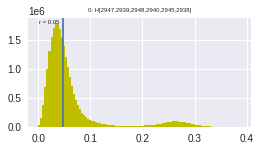

0 H[2947,2939,2948,2940,2945,2938]
min_frequency   min_cluster     radius   cnn_cutoff     
0.001           2               0.047    5              
--------------------------------------------------


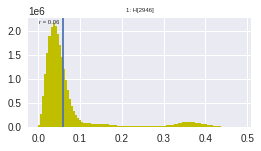

1 H[2946]
min_frequency   min_cluster     radius   cnn_cutoff     
0.0             2               0.058    15             
--------------------------------------------------


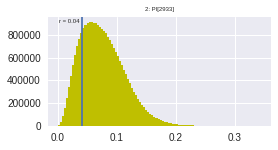

2 PI[2933]
min_frequency   min_cluster     radius   cnn_cutoff     
0               1               0.041    15             
--------------------------------------------------


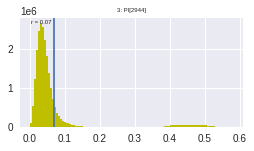

3 PI[2944]
min_frequency   min_cluster     radius   cnn_cutoff     
0.0             2               0.07     15             
--------------------------------------------------


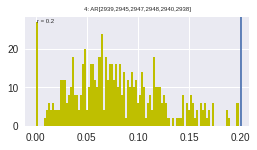

4 AR[2939,2945,2947,2948,2940,2938]
min_frequency   min_cluster     radius   cnn_cutoff     
0               0               0        15             
--------------------------------------------------


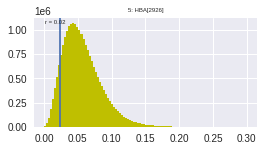

5 HBA[2926]
min_frequency   min_cluster     radius   cnn_cutoff     
0               1               0.024    15             
--------------------------------------------------


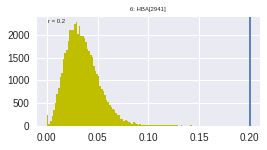

6 HBA[2941]
min_frequency   min_cluster     radius   cnn_cutoff     
0               0               0        15             
--------------------------------------------------


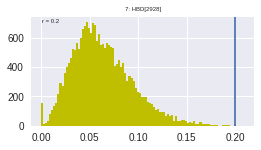

7 HBD[2928]
min_frequency   min_cluster     radius   cnn_cutoff     
0               0               0        15             
--------------------------------------------------


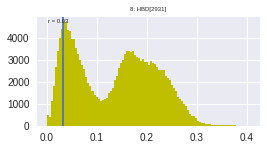

8 HBD[2931]
min_frequency   min_cluster     radius   cnn_cutoff     
0.007           2               0.032    3              
--------------------------------------------------


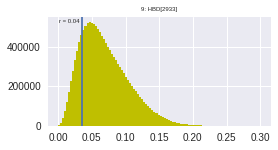

9 HBD[2933]
min_frequency   min_cluster     radius   cnn_cutoff     
0               1               0.036    15             
--------------------------------------------------


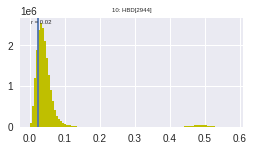

10 HBD[2944]
min_frequency   min_cluster     radius   cnn_cutoff     
0               2               0.023    15             
--------------------------------------------------
Parameter predicted and added
0 H[2947,2939,2948,2940,2945,2938]
-----------------------------------------------------------------------------------------------
#points   r         c         min       max       #clusters %largest  %noise    time     
4903      0.047     5         10        None      2         0.958     0.002     00:00:2.072
-----------------------------------------------------------------------------------------------

1 H[2946]
-----------------------------------------------------------------------------------------------
#points   r         c         min       max       #clusters %largest  %noise    time     
4989      0.058     15        10        None      2         0.960     0.003     00:00:2.400
----------------------------------------------------------------------------------------------

100%|█████████████████████████████████████████████| 9/9 [00:03<00:00,  2.36it/s]
<string>:132: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


-----------------------------------------------------------------------------------------------
#points   r         c         min       max       #clusters %largest  %noise    time     
417       0.050     0.000     10        None      2         0.866     0.031     00:00:0.008
-----------------------------------------------------------------------------------------------

Solution found with parameter scan
Failed for HBD[2931]
Result
0 H[2947,2939,2948,2940,2945,2938]
-----------------------------------------------------------------------------------------------
#points   r         c         min       max       #clusters %largest  %noise    time     
4903      0.047     5         10        None      2         0.958     0.002     00:00:2.084
-----------------------------------------------------------------------------------------------

1 H[2946]
-----------------------------------------------------------------------------------------------
#points   r         c         min       max   

['HBD[2931]']

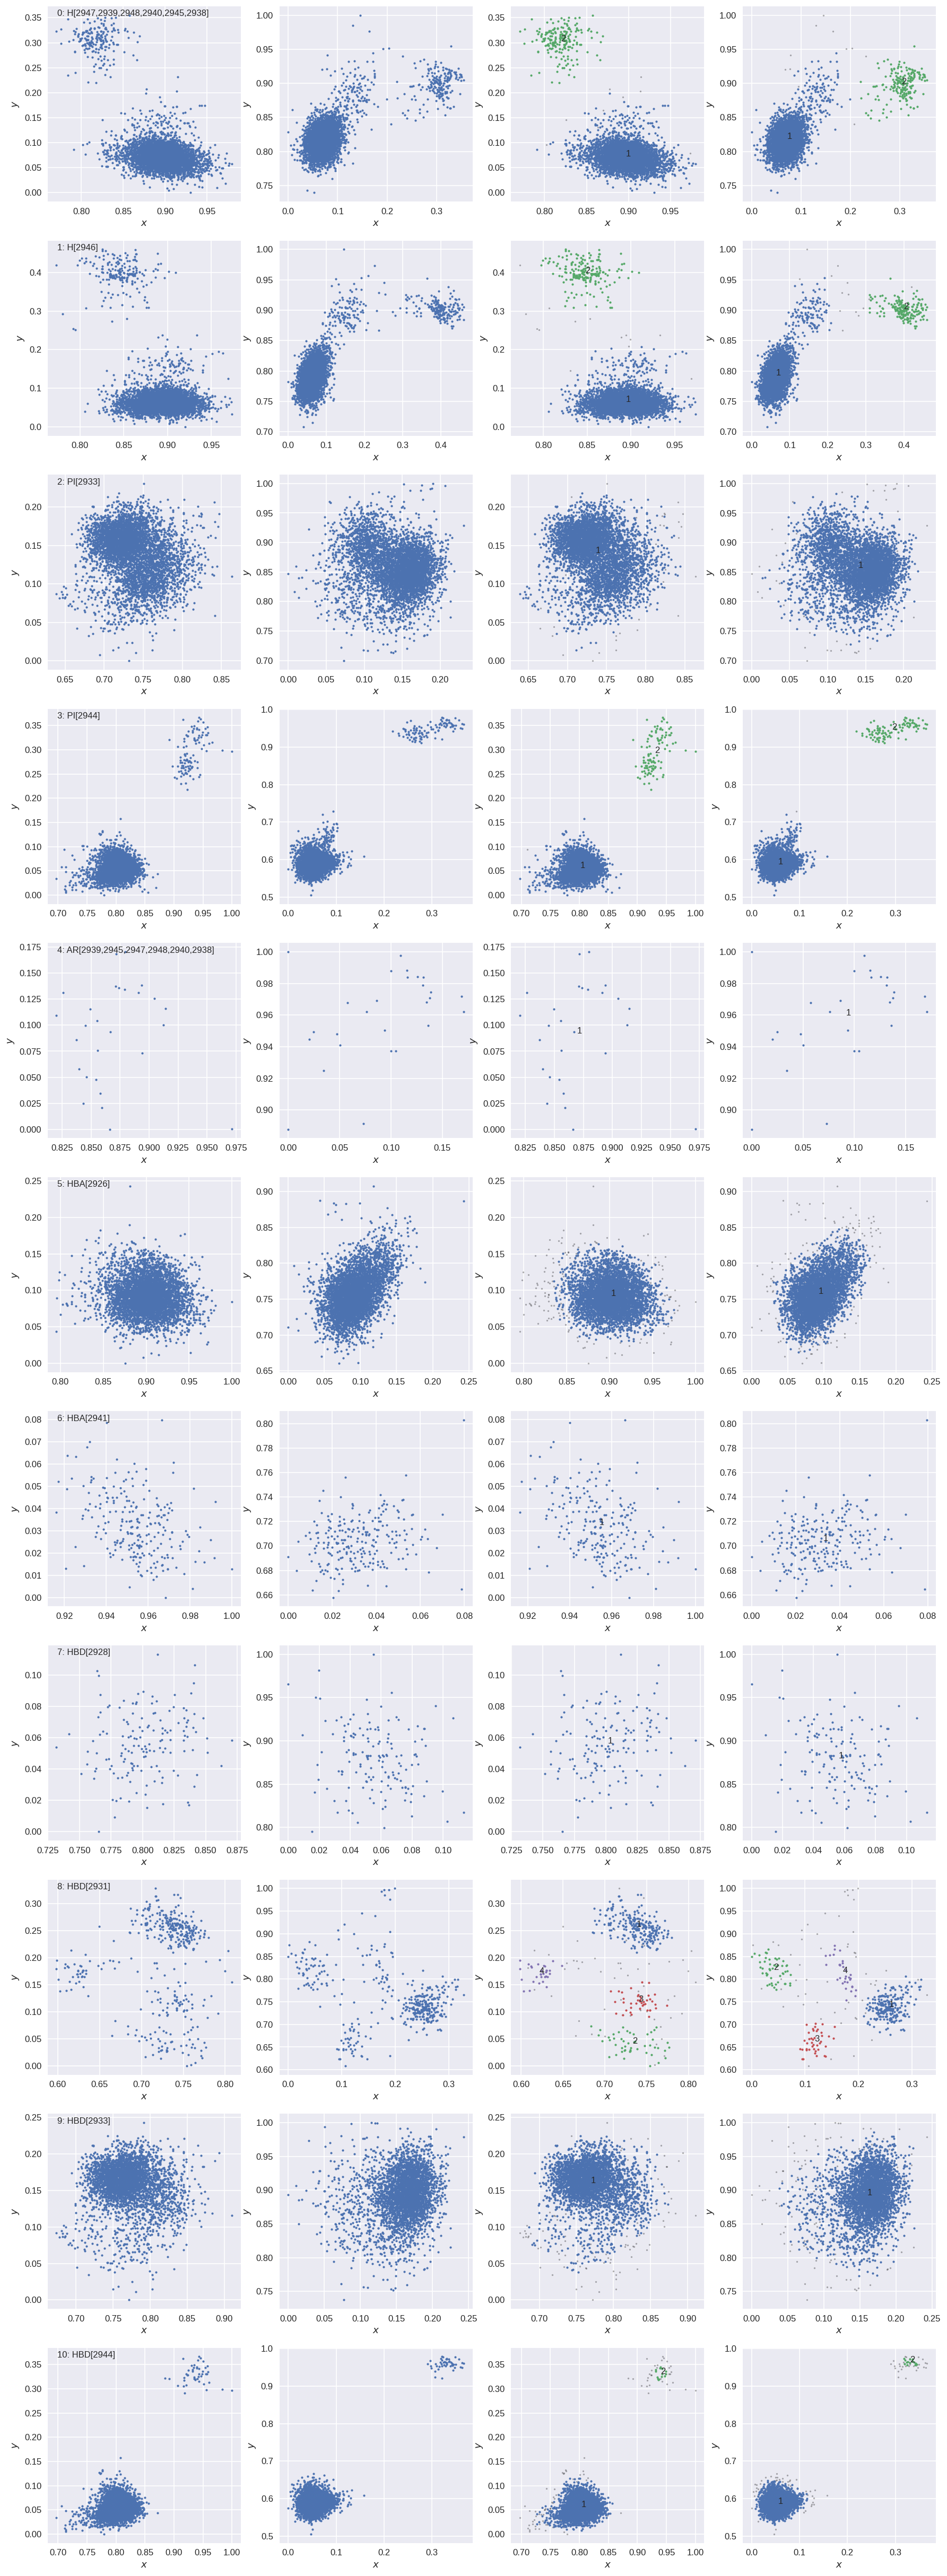

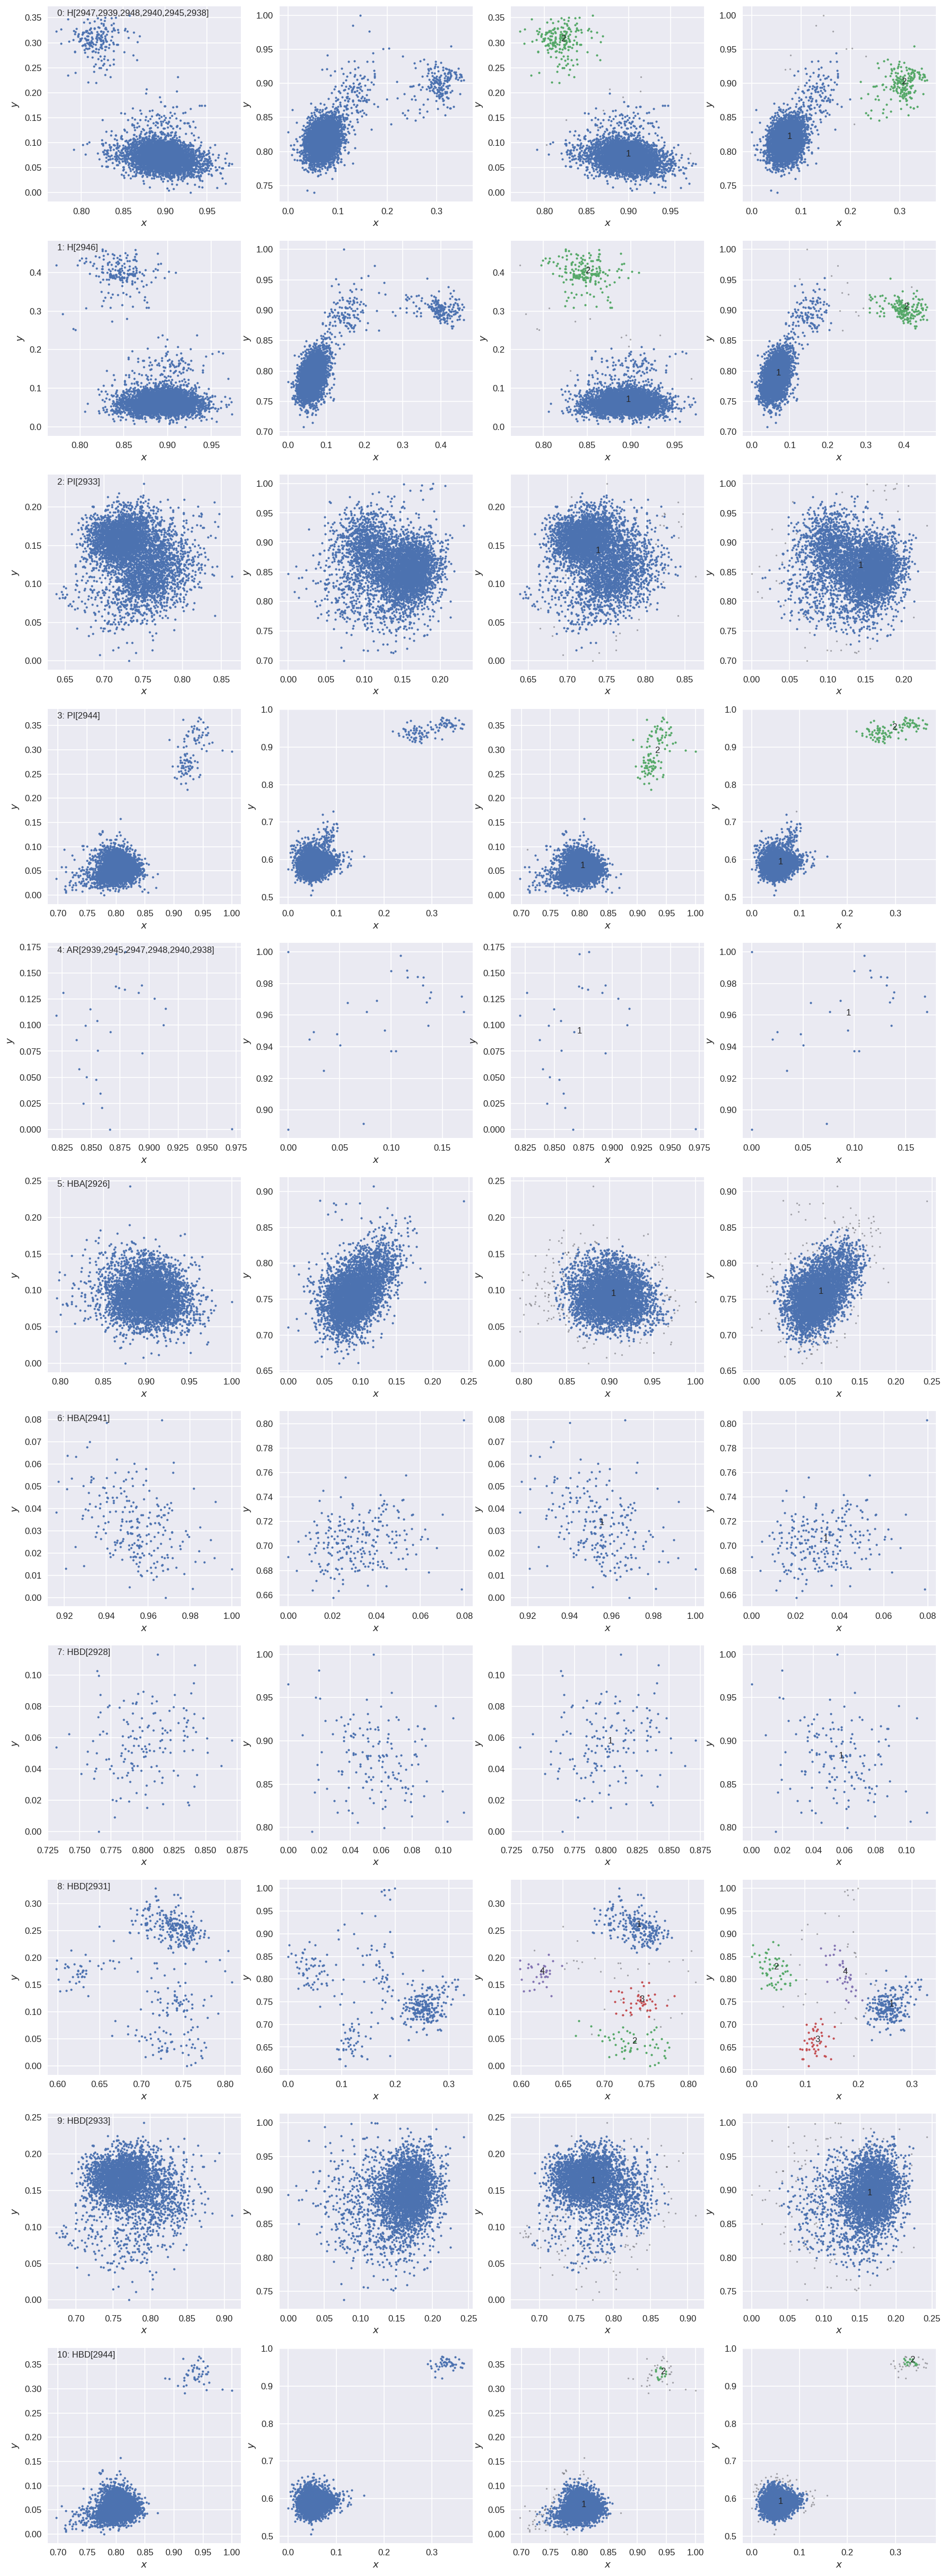

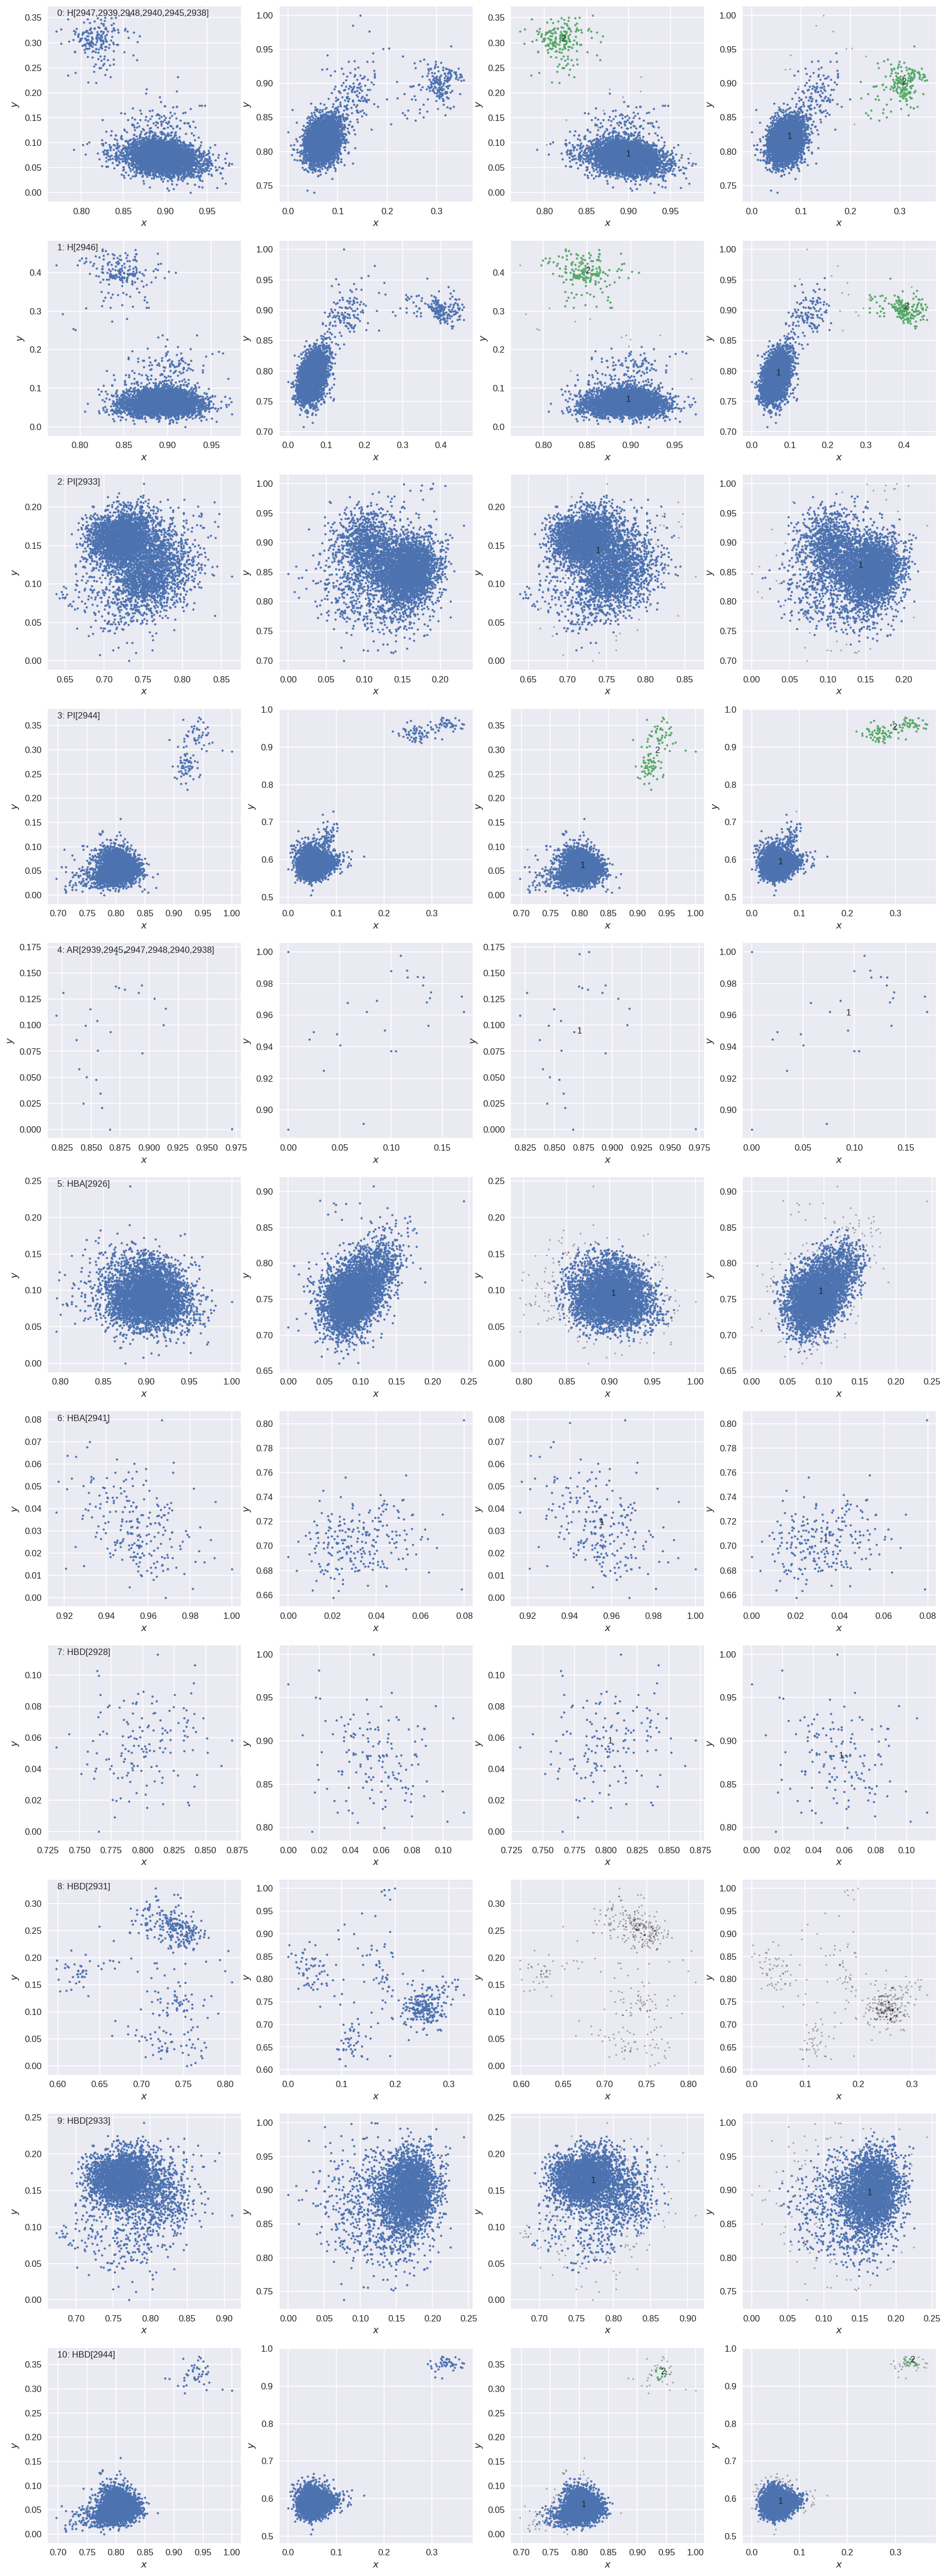

In [5]:
please_manual = clustering.auto_cluster(data, dynophore_dict, include_time = include_time, only_result = False,
                                        plot_search_parameter = True, plot_clustering = True)
                                        
please_manual

### Auto-picker

In [ ]:
data = compute.add_auto_param(data, dynophore_dict, include_time)

### Parameter scan

In [ ]:
new_params = parameter_scan(data, key=['HBD[3218]'])

### Specify parameters manually

In [6]:
data['HBD[2931]']["params"] = {
    "radius_cutoff": 0.05,
    "cnn_cutoff": 4,
    "member_cutoff": 2    
}

## Part a) Cluster features individual using CommonNN

8 HBD[2931]
-----------------------------------------------------------------------------------------------
#points   r         c         min       max       #clusters %largest  %noise    time     
417       0.050     4         2         None      5         0.600     0.043     00:00:0.008
-----------------------------------------------------------------------------------------------



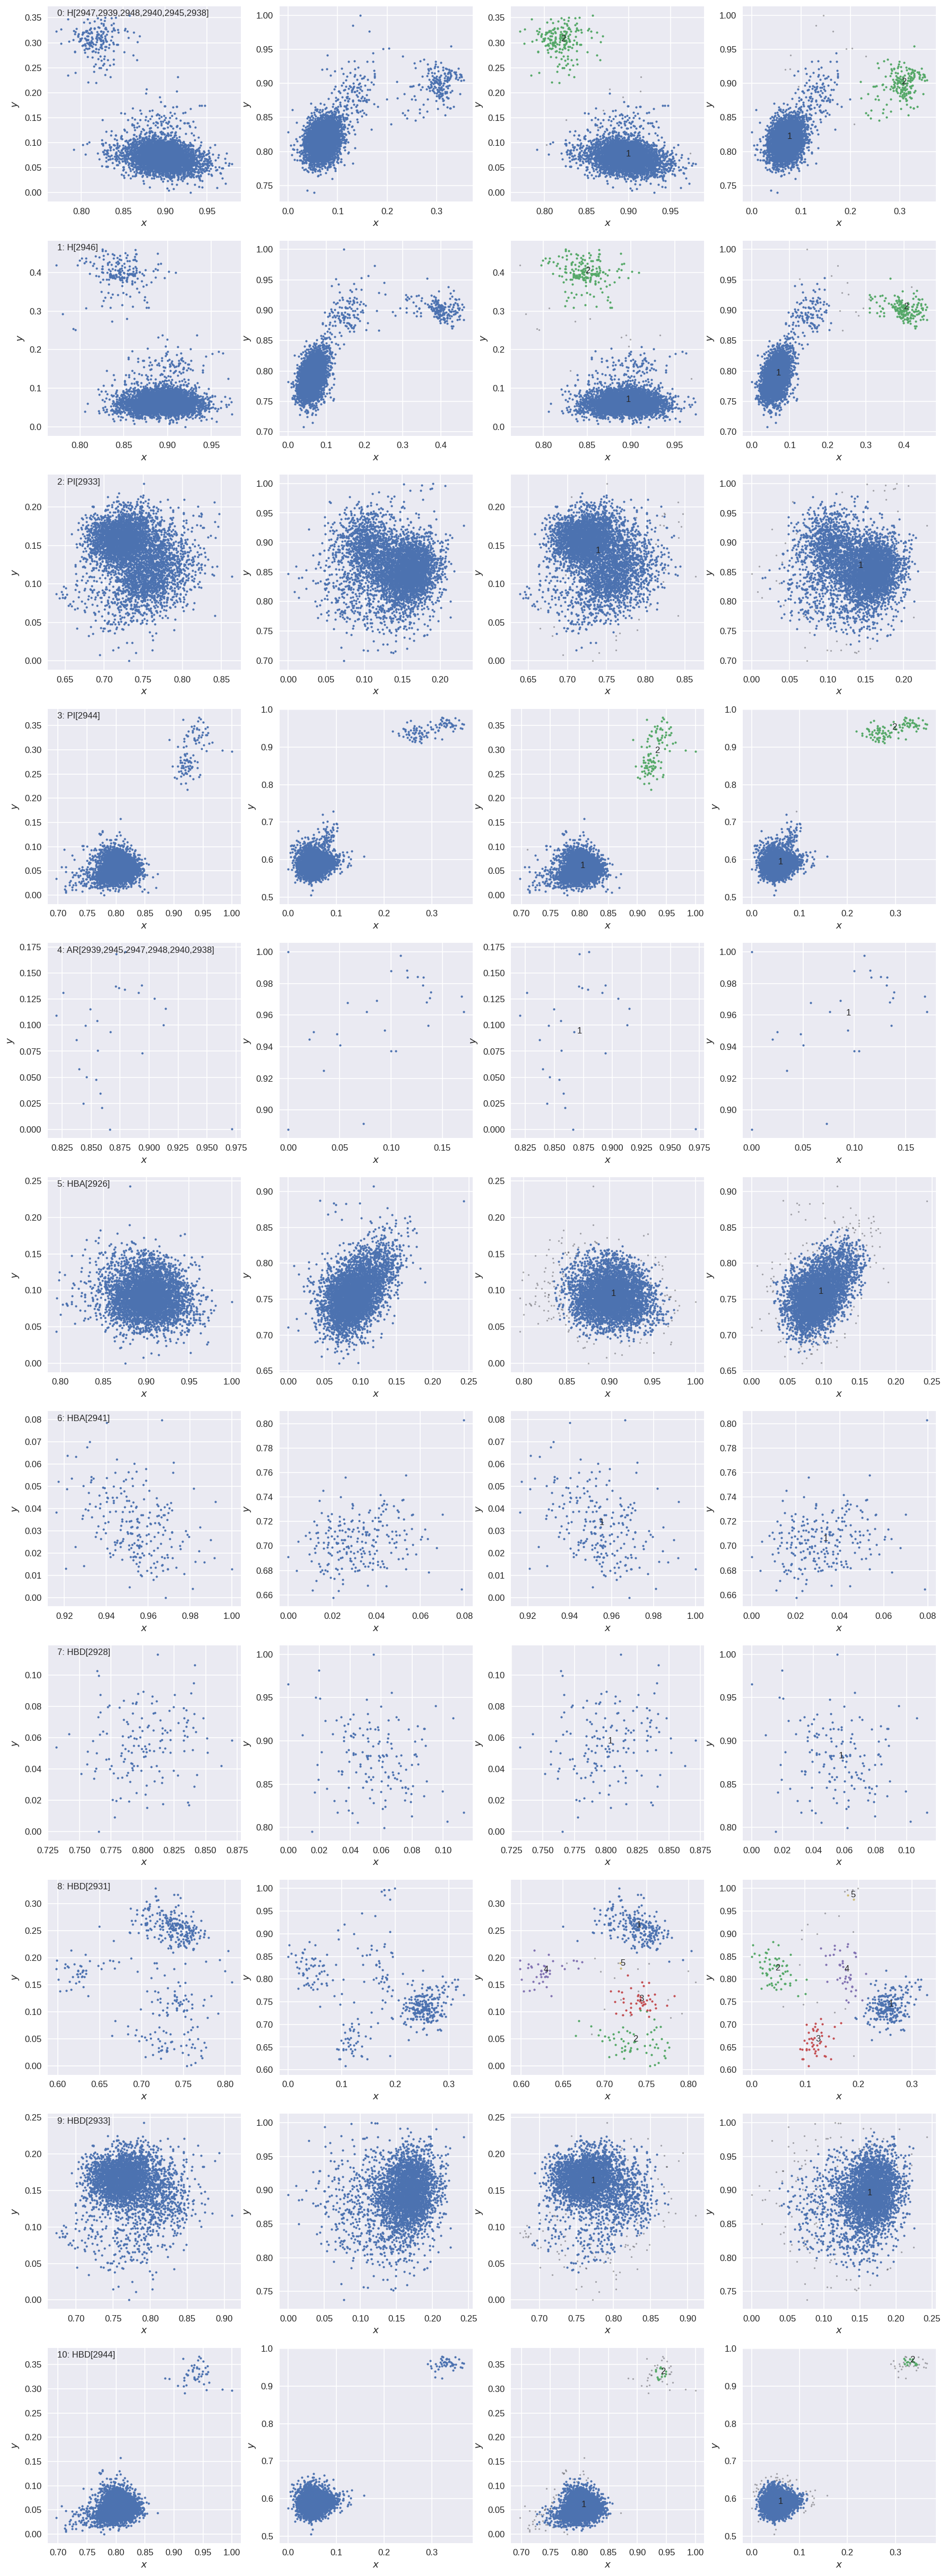

In [7]:
data, need_redo = clustering.do_cluster(data, include_time = False, redo = ['HBD[2931]'], plot = True, v = True)

In [8]:
need_redo

{}

## One-hot encoding

In [ ]:
pam = clustering.binding_state_cluster(data)

In [ ]:
write.split_trajectory(pam, pdb_path, dcd_path, n_drop = n_drop)

### get state matrix

In [ ]:
state_matrix = compute.get_state_matrix(data)
state_matrix

In [ ]:
state_matrix.shape

In [ ]:
# states (onehot elements) per interaction
states_per_interaction = [max(x) + 1 for x in state_matrix.T]
states_per_interaction

### One-hot key encoding

In [ ]:
one_hot_matrix = compute.get_one_hot_encoding(state_matrix)
one_hot_matrix

In [ ]:
one_hot_matrix.shape

### Part b) Cluster all features together

In [ ]:
# clustering.get_binding_pose_cluster_inertia(one_hot_matrix)

In [ ]:
# from sklearn_extra import cluster as skecluster

# n_clusters = int(input("Please give cluster number: "))

# pam = skecluster.KMedoids(n_clusters = n_clusters, metric = "manhattan", method = "pam")
# pam.fit(one_hot_matrix)
# pam.cluster_centers_

In [ ]:
# center_features = clustering.get_center_features(data, pam)
# center_features

For more insight one may have to look at the dynophore structures

In [ ]:
# pam.labels_

## Analysis

In [ ]:
state_matrix = compute.get_state_matrix(data)
state_matrix

In [ ]:
state_statistis = compute.get_state_statistis(pam, data, dynophore_dict)

In [ ]:
feature_per_state = compute.get_feature_freq_per_state(state_statistis, data)
feature_per_state

In [ ]:
interact_summary = compute.get_interact_summary(data, pam, dynophore_dict)
interact_summary

In [ ]:
import pandas as pd

cluster_frames_map = compute.get_frames_each_cluster(pam)
cluster_frames_map

In [ ]:
visualize.plot_bar_code(pam, n_drop = n_drop)

In [ ]:
visualize.plot_radar(feature_per_state, xmin = 0, xmax = 0.9)

In [ ]:
visualize.plot_cluster_rmsd(pam, pdb_path, select = 'chainID X')

In [ ]:
# visualize.plot_whole_rmsd(pdb_path, dcd_path, select = 'chainID X', alignment = True, n_drop = 0)

In [ ]:
diffusion_matrix = visualize.plot_diffusionmap(pdb_path, dcd_path, reduce = True)

## 2D and 3D visualization of all features

In [9]:
wrap_data = parsers.get_wrap_data(data)
wrap_data

[array([[  2.634384,  -9.274565,   4.11705 ,   2.      ,   0.      ],
        [  2.254932,  -8.2329  ,   3.551692,   2.      ,   0.      ],
        [  2.058865,  -8.843123,   3.306274,   2.      ,   0.      ],
        ...,
        [  3.112514, -13.629376,   1.441208,   1.      ,   0.      ],
        [  2.771906, -13.171057,   1.549852,   1.      ,   0.      ],
        [  2.777146, -13.164905,   1.558842,   1.      ,   0.      ]]),
 array([[  4.377498,  -8.289847,   6.382301,   2.      ,   1.      ],
        [  3.83304 ,  -6.802415,   5.541427,   2.      ,   1.      ],
        [  3.679496,  -7.282129,   5.238824,   2.      ,   1.      ],
        ...,
        [  4.618021, -16.078241,   2.037248,   1.      ,   1.      ],
        [  4.554136, -15.435437,   2.027095,   1.      ,   1.      ],
        [  4.575342, -15.447514,   2.053033,   1.      ,   1.      ]]),
 array([[ -3.3380547, -11.96756  ,  -1.4834137,   1.       ,   2.       ],
        [ -3.4409454, -12.304478 ,  -1.3002375,   1.   

In [10]:
len(wrap_data)

11

In [ ]:
wrap_data[0]

In [ ]:
visualize.draw_2d_wrap_data(data, dynophore_dict, wrap_data)

In [ ]:
visualize.draw_3d_wrap_data(data, dynophore_dict, wrap_data)

## Write to pml

In [ ]:
pdb_array = write.get_atoms_coord(pdb_path)

In [11]:
frequency_cutoff = {'H': 0.1, 'AR': 0.03, 'HA2': 0.2, 'HD2': 0.2, 'HDA': 0.2,
                            'HBD': 0.2, 'HBA': 0.2, 'HA': 0.2, 'HD': 0.2, 'HI': 0.2, 'PI': 0.2, 'NI': 0.2}

features = write.extract_superfeature(wrap_data, dynophore_dict, pdb_path, pml_path, dyno_path, include_time = include_time)
features

[[1,
  'H',
  'M',
  array([ 1.780983, -9.01564 ,  3.406885]),
  1.5,
  array([ 6.2495    , -9.83192857,  1.81907143]),
  0.0,
  1.0],
 [2,
  'H',
  'M',
  array([  3.1064215, -12.8268765,   2.232993 ]),
  1.5,
  array([ 6.2495    , -9.83192857,  1.81907143]),
  0.0,
  1.0],
 [3,
  'H',
  'M',
  array([  3.156289 , -11.803981 ,   3.8095615]),
  1.5,
  array([ 6.2495    , -9.83192857,  1.81907143]),
  0.0,
  1.0],
 [4,
  'H',
  'M',
  array([ 3.9056515, -7.7733525,  5.3603385]),
  1.5,
  array([ 5.51918519, -6.99322222,  4.23977778]),
  0.0,
  1.0],
 [5,
  'H',
  'M',
  array([  4.8160105, -14.7631015,   3.338252 ]),
  1.5,
  array([ 5.51918519, -6.99322222,  4.23977778]),
  0.0,
  1.0],
 [6,
  'H',
  'M',
  array([  4.3504515, -10.5677605,   5.9059065]),
  1.5,
  array([ 5.51918519, -6.99322222,  4.23977778]),
  0.0,
  1.0],
 [7,
  'PI',
  'M',
  array([ -3.31019495, -11.572311  ,  -1.80753465]),
  1.5,
  array([ -3.26366667, -11.0735    ,  -3.927     ]),
  0.0,
  1.0],
 [8,
  'PI',
  

In [12]:
write.pharmacophore_writer(data, dynophore_dict, pdb_path, pml_path, dyno_path, include_time = include_time)

Pharmacophore successfully written into pml file.


## backup

In [ ]:
# def get_feature_freq_per_state(state_statistis):
#     '''Get frequency of each superfeature in each binding pose
#        output: dict
#            e.g. {binding pose 1: {superfeature 1:frequency,
#                                  {superfeature 2:frequency,
#                                  {superfeature 3...}}}'''
#     feature_per_state = {}
#     for state_idx, data_ in state_statistis.items():
#         cache = {}
#         for feature, _data_ in data_.items():
#             number = 0
#             for state, count in _data_.items():
#                 if state > 0:
#                     number += count
#             cache[feature] = number/max_frame
#         feature_per_state[state_idx] = cache
#     return feature_per_state




# feature_per_state = {}
# for state_idx, data_ in state_statistis.items():
#     cache = {}
#     for feature, _data_ in data_.items():
#         number = 0
#         for state, count in _data_.items():
#             if state > 0:
#                 number += count
# #         print("==", number)
#         cache[feature] = number/max_frame
#     feature_per_state[state_idx] = cache
# feature_per_state

In [ ]:
# def get_interact_summary(feature_per_state, dynophore_dict):
#     '''output: DataFrame
#        e.g.
#                 0	1	2	3	feature
#     0	0.077521	0.130609	0.067970	0.290982	H[3187,3181,3178,3179,3185,3183]
#     1	0.000000	0.000000	0.000000	0.000000	H[3146]
#     2	0.249000	0.117503	0.166148	0.432474	H[3150,3152,3158,3156,3154,3149]'''
#     feature_per_state_df = pd.DataFrame(feature_per_state)
#     interact_summary = feature_per_state_df.copy()
#     interact_summary["feature"] = dynophore_dict.keys()
#     return interact_summary

    
    
# feature_per_state_df = pd.DataFrame(feature_per_state)
# interact_summary = feature_per_state_df.copy()
# interact_summary["feature"] = dynophore_dict.keys()
# interact_summary

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt


# def plot_radar(feature_per_state, xmin = 0.5, xmax = 1):
#     '''Plot interaction frequency within each cluster as radar plot'''
#     state_count = len(feature_per_state.keys())
#     data_length = len(feature_per_state[0])
#     # split polar coordinates
#     angles = np.linspace(0, 2*np.pi, data_length, endpoint=False)
#     labels = [key for key in feature_per_state[0].keys()]

#     feature = []
#     for i in feature_per_state:
#         feature_temp = feature_per_state[i]
#         temp = [i for i in feature_temp.values()]
#         feature.append(temp)

#     angles = np.concatenate((angles, [angles[0]]))
#     labels = np.concatenate((labels, [labels[0]]))
    
#     fig = plt.figure(figsize=(8, 6), dpi=100)
    
#     ax = plt.subplot(111, polar=True)
#     feature_map = {
#         k: np.concatenate((feature[k], [feature[k][0]]))
#         for k in range(state_count)
#     }

#     colors = ["g", "b", "r", "y", "m", "k", "c"]
#     for i in feature_map:
#         feature_temp = feature_map[i]
#         ax.plot(angles, feature_temp, color = colors[i], label = f"state {i}")

#     ax.set_thetagrids(angles*180/np.pi, labels)
#     ax.set_theta_zero_location('N')
#     ax.set_rlim(xmin, xmax)
#     ax.set_rlabel_position(270)
#     ax.set_title("interaction frequency of cluters")
#     plt.legend(bbox_to_anchor = (1.2, 1.05))
#     plt.show()


# plot_radar(feature_per_state)

    



# # results = feature_per_state

# # state_count = len(feature_per_state.keys())
# # data_length = len(results[0])
# # # 将极坐标根据数据长度进行等分
# # angles = np.linspace(0, 2*np.pi, data_length, endpoint=False)
# # labels = [key for key in results[0].keys()]

# # #     print(results[result])
# # #     print("=========")
# # score = []
# # for result in results:
# #     results_temp = results[result]
# #     score_temp = [i for i in results_temp.values()]
# #     score.append(score_temp)
# # # print(score)

# # angles = np.concatenate((angles, [angles[0]]))
# # labels = np.concatenate((labels, [labels[0]]))
# # # 设置图形的大小
# # fig = plt.figure(figsize=(8, 6), dpi=100)
# # # 新建一个子图
# # ax = plt.subplot(111, polar=True)
# # # 绘制雷达图
# # # 使雷达图数据封闭
# # score_map = {
# #     k: np.concatenate((score[k], [score[k][0]]))
# #     for k in range(state_count)
# # }
# # print(score_map)

# # colors = ["g", "b", "r", "y"]
# # for i in score_map:
# #     score_temp = score_map[i]
# #     ax.plot(angles, score_temp, color = colors[i], label = f"state {i}")

# # # 设置雷达图中每一项的标签显示
# # ax.set_thetagrids(angles*180/np.pi, labels)
# # # 设置雷达图的0度起始位置
# # ax.set_theta_zero_location('N')
# # # 设置雷达图的坐标刻度范围
# # ax.set_rlim(0.5, 0)
# # # 设置雷达图的坐标值显示角度，相对于起始角度的偏移量
# # ax.set_rlabel_position(270)
# # ax.set_title("interaction frequency of cluters")
# # plt.legend(bbox_to_anchor = (1.2, 1.05))
# # plt.show()

In [ ]:
# import pandas as pd

# test = pd.DataFrame(feature_per_state)
# max_frame = max([x["frames"][-1] for x in data.values()])
# test/= max_frame

# print(test)
# test.plot(figsize = (4,3))

In [ ]:
# '''inspect which superfeatures appear in each states'''

# import dynophores as dyno
# import pandas as pd
# n_drop = 0

# dynophore = dyno.Dynophore.from_dir("../../5_clustering/dynophore_out_2022-02-06_16-44-28-ZIKA")
# n_frames = dynophore.n_frames
# max_frame = max([x["frames"][-1] for x in data.values()])

# def extract_coor_frame(dynophore_dict, n_frames, n_drop):
#     df = pd.DataFrame(columns = dynophore_dict.keys(), index = range(n_frames - n_drop))
#     data_sp = []
#     for k, key in enumerate(dynophore_dict.keys()):
#         for i in dynophore_dict[key]['points']:
#             frame = int(list(i.values())[-2])
# #             print(frame)
            
#             df.loc[frame, key] = 1
            
#     return df

# df = extract_coor_frame(dynophore_dict, n_frames, n_drop = 500)
# df

# interact_summary = np.empty(shape=(0, len(dynophore_dict.keys())))

# for label in np.unique(pam.labels_):
#     frames = pd.DataFrame(np.argwhere(pam.labels_ == label))[0].values.tolist()
# #     count_frames = len(frames)
# #     print(count_frames)
#     summary = np.array(df.loc[frames].count()).astype(dtype=int)
#     summary = (summary/max_frame).round(2)
#     interact_summary = np.vstack((interact_summary, summary))

# interact_summary = pd.DataFrame(interact_summary.T)
# interact_summary.plot(figsize = (4,3))

# interact_summary["superfeature"] = np.array(list(dynophore_dict.keys()))

# interact_summary

In [ ]:
# interact_summary = np.empty(shape=(0, len(dynophore_dict.keys())))

# for label in np.unique(pam.labels_):
#     frames = pd.DataFrame(np.argwhere(pam.labels_ == label))[0].values.tolist()
#     count_frames = len(frames)
#     print(count_frames)

In [ ]:
# import collections
# import matplotlib.pyplot as plt

# def plot_bar_code(pam, n_drop = 0):
#     n_frames = len(pam.labels_)
#     x = np.array(range(n_frames)) + n_drop
#     plt.figure(figsize=(15, 7), dpi=80)

#     plt.scatter(x, pam.labels_, marker = "|")
#     plt.xlabel("original frame")
#     plt.ylabel("binding state")

#     n_cluster = len(np.unique(pam.labels_))
#     counter = dict(collections.Counter(pam.labels_))
#     print("There are", n_cluster, "clusters")
#     print(f"Frames within each binding state: {counter}")
    
# plot_bar_code(pam, n_drop = n_drop)

In [ ]:
import MDAnalysis as mda
import matplotlib.pyplot as plt
from MDAnalysis.analysis import align, rms, diffusionmap

pdb_path = 'HIV.pdb'
dcd_path = 'HIV.dcd'

n_drop=500
u = mda.Universe(pdb_path, dcd_path, in_memory=True)
ligand = u.select_atoms('chainID X')

# reference_coordinates = u.trajectory.timeseries(asel=ligand).mean(axis=1)
# reference = mda.Merge(ligand).load_new(
#             reference_coordinates[:, None, :], order="afc")
# ref_ca = reference.select_atoms('chainID X')

# aligner = align.AlignTraj(u, reference, select='chainID X', in_memory=True).run()

rmsd_align_ls = []
X_align =  np.arange(n_drop, len(u.trajectory))

mobile = mda.Universe(pdb_path, dcd_path)
# ref = mda.Universe(pdb_path, dcd_path).trajectory[0]
# ref_ca = ref.select_atoms('chainID X')

for i in X_align:
    
    mobile.trajectory[i] # set mobile trajectory to last frame
    mobile_ca = mobile.select_atoms('chainID X')

    rmsd_ = rms.rmsd(mobile_ca.positions, ligand.positions, superposition=False)
    rmsd_align_ls.append(rmsd_)
    
max_rmsd = np.max(np.array(rmsd_align_ls))


plt.figure(figsize=(15,5))

plt.plot(X_align, rmsd_align_ls)
plt.ylim(bottom = 0)
plt.title(f"RMSD of ligand: {round(np.mean(np.array(rmsd_align_ls)), 2)}")
plt.show()

In [ ]:
X_align

In [ ]:
rmsd_align_ls

In [ ]:
frames_each_cluster

In [ ]:
# frames_each_cluster = get_frames_each_cluster(pam)
# rmsd_align_ls_arr = np.array(rmsd_align_ls)
# X_arr = np.array(X_align)

# plt.figure(figsize=(10,5))

# for i in np.unique(pam.labels_):
# #     row = i//3 + 1
# #     col = i%3 + 1

#     rmsd_arr = rmsd_align_ls_arr[frames_each_cluster[i]]
#     X_arr = X_align[frames_each_cluster[i]]
    
#     # plot
#     plt.subplot(numRows, numCols, (i + 1))
    
#     plt.ylim(0, np.max(rmsd_align_ls_arr)+0.5)
    
#     plt.plot(X_arr, rmsd_arr)
#     plt.title(f"State {i} avg. RMSD = {round(np.mean(rmsd_arr), 2)}", fontsize = 8)
#     plt.xlabel("Frames")
#     plt.ylabel("RMSD ($\AA$)")
    
# plt.tight_layout() 

In [ ]:
frames_each_cluster = get_frames_each_cluster(pam)
frames_each_cluster

### RMSD

In [ ]:
import MDAnalysis as mda
from MDAnalysis.analysis import align, rms, diffusionmap

pdb_path = 'HIV.pdb'
dcd_path = 'HIV.dcd'


def plot_whole_rmsd(pdb_path, dcd_path, select = 'chainID X', alignment = True, n_drop = 0):
    u = mda.Universe(pdb_path, dcd_path, in_memory=True)
    ligand = u.select_atoms(select)
    
    rmsd_ls = []
    X =  np.arange(n_drop, len(u.trajectory))
    
    if alignment:
        # alignment
        reference_coordinates = u.trajectory.timeseries(asel=ligand).mean(axis=1)
        reference = mda.Merge(ligand).load_new(
                    reference_coordinates[:, None, :], order="afc")
        ref_ca = reference.select_atoms(select)
        aligner = align.AlignTraj(u, reference, select = select, in_memory=True).run()
    
        # get RMSD
        rmsd_ls = []
        Xn =  range(len(u.trajectory))

        mobile = mda.Universe(pdb_path, dcd_path)

        for i in X:
            mobile.trajectory[i]
            mobile_ca = mobile.select_atoms(select)

            rmsd_ = rms.rmsd(mobile_ca.positions, ref_ca.positions, superposition=False)
            rmsd_ls.append(rmsd_)

    
    else:
        mobile = mda.Universe(pdb_path, dcd_path)

        for i in X:
            mobile.trajectory[i]
            mobile_ca = mobile.select_atoms(select)

            rmsd_ = rms.rmsd(mobile_ca.positions, ligand.positions, superposition=False)
            rmsd_ls.append(rmsd_)
        
    plt.figure(figsize=(15,5))

    plt.plot(X, rmsd_ls)
    plt.ylim(bottom = 0)
    plt.show()

plot_rmsd(pdb_path, dcd_path, n_drop = 500, alignment=False)

In [ ]:
import math

def plot_cluster_rmsd(pam, pdb_path, dcd_path = "output/", select = 'chainID X'):
    n_cluster = np.max(pam.labels_) + 10
    numRows =  math.ceil(n_cluster/3)
    numCols = 3
    
    plt.figure(figsize=(20,15))
    
    for k in np.unique(pam.labels_):
        u = mda.Universe(pdb_path, f"{dcd_path}cluster_{k}.dcd", in_memory = True)
        ligand = u.select_atoms(select)
        # reference = average structure
        reference_coordinates = u.trajectory.timeseries(asel=ligand).mean(axis=1)
        reference = mda.Merge(ligand).load_new(
                    reference_coordinates[:, None, :], order="afc")
        ref_ca = reference.select_atoms('chainID X')
        aligner = align.AlignTraj(u, reference, select = select, in_memory = True).run()

        rmsd_ls = []
        X =  range(len(u.trajectory))
        mobile = mda.Universe(pdb_path, f"{dcd_path}cluster_{k}.dcd")

        for j in X:
            mobile.trajectory[j]
            mobile_ca = mobile.select_atoms(select)

            rmsd_ = rms.rmsd(mobile_ca.positions, ref_ca.positions, superposition = False)
            rmsd_ls.append(rmsd_)

        # plot
        plt.subplot(numRows, numCols, (k + 1))
        max_rmsd = np.max(np.array(rmsd_ls)) + 0.5
        plt.ylim(0, max_rmsd)

        plt.plot(X, rmsd_ls)
        plt.title(f"State {k} avg. RMSD = {round(np.mean(np.array(rmsd_ls)), 2)}")
        plt.xlabel("Frames")
        plt.ylabel("RMSD ($\AA$)")
    plt.tight_layout() 
        
plot_cluster_rmsd(pam, pdb_path, dcd_path = "output/", select = 'chainID X')

In [ ]:
# import MDAnalysis as mda
# from MDAnalysis.analysis import align, rms, diffusionmap

# pdb_path = 'HIV.pdb'
# dcd_path = 'HIV.dcd'

# u = mda.Universe(pdb_path, dcd_path, in_memory=True)
# ligand = u.select_atoms('chainID X')

# reference_coordinates = u.trajectory.timeseries(asel=ligand).mean(axis=1)
# reference = mda.Merge(ligand).load_new(
#             reference_coordinates[:, None, :], order="afc")
# ref_ca = reference.select_atoms('chainID X')

# aligner = align.AlignTraj(u, reference, select='chainID X', in_memory=True).run()

# rmsd_align_ls = []
# X_align =  range(len(u.trajectory))

# mobile = mda.Universe(pdb_path, dcd_path)

# for i in X_align:
    
#     mobile.trajectory[i] # set mobile trajectory to last frame
#     mobile_ca = mobile.select_atoms('chainID X')

#     rmsd_ = rms.rmsd(mobile_ca.positions, ref_ca.positions, superposition=False)
#     rmsd_align_ls.append(rmsd_)
    
# max_rmsd = np.max(np.array(rmsd_align_ls))


# plt.figure(figsize=(15,5))

# plt.plot(X_align, rmsd_align_ls)
# plt.ylim(bottom = 0)
# plt.title(f"RMSD of ligand after alignment to mean coordinates: {round(np.mean(np.array(rmsd_align_ls)), 2)}")
# plt.show()

In [ ]:
import math

n_cluster = 4
numRows =  math.ceil(n_cluster/3)
numCols = 3


plt.figure(figsize=(10,5))

for k, i in enumerate(np.unique(pam.labels_)):
#     row = i//3 + 1
#     col = i%3 + 1
    u = mda.Universe(pdb_path, f"output/cluster_{k}.dcd", in_memory=True)
    ligand = u.select_atoms('chainID X')
    # reference = average structure
    reference_coordinates = u.trajectory.timeseries(asel=ligand).mean(axis=1)
    reference = mda.Merge(ligand).load_new(
                reference_coordinates[:, None, :], order="afc")
    ref_ca = reference.select_atoms('chainID X')
    aligner = align.AlignTraj(u, reference, select='chainID X', in_memory=True).run()
    
    
    rmsd_align_ls = []
    X_align =  range(len(u.trajectory))

    mobile = mda.Universe(pdb_path, f"output/cluster_{k}.dcd")

    for j in X_align:
        mobile.trajectory[j]
        mobile_ca = mobile.select_atoms('chainID X')

        rmsd_ = rms.rmsd(mobile_ca.positions, ref_ca.positions, superposition=False)
        rmsd_align_ls.append(rmsd_)
    
    # plot
    plt.subplot(numRows, numCols, (i + 1))
    
    plt.ylim(0, max_rmsd)
    
    plt.plot(X_align, rmsd_align_ls)
    plt.title(f"State {i} avg. RMSD = {round(np.mean(np.array(rmsd_align_ls)), 2)}", fontsize = 8)
    plt.xlabel("Frames")
    plt.ylabel("RMSD ($\AA$)")

## drop noise

In [ ]:
col_to_del = []

print("position in one_hot_matrix     (superfeature idx, state)")
for pos in range(0, len(one_hot_matrix[0])):
    superfeature_idx, state = get_feature_state_from_onehot_position(pos, states_per_interaction)
    print_txt = ""
    if state == 0:
        col_to_del.append(pos)
        print_txt = "(dropped)"
    print(pos, (superfeature_idx, state), print_txt)

one_hot_matrix2 = np.delete(one_hot_matrix, col_to_del, axis=1)
print(len(one_hot_matrix2[0]), "states are considered (after dropping noises)")

In [ ]:
inertia = []
for n_clusters in tqdm(range(2, 8)):
    pam = skecluster.KMedoids(n_clusters=n_clusters, metric="manhattan", method="pam")
    pam.fit(one_hot_matrix)
    inertia.append(pam.inertia_)

In [ ]:
# col_to_del = []

# print("position in one_hot_matrix     (superfeature idx, state)")
# for pos in range(0, len(one_hot_matrix[0])):
#     superfeature_idx, state = get_feature_state_from_onehot_position(pos, states_per_interaction)
#     print_txt = ""
#     if state == 0:
#         col_to_del.append(pos)
#         print_txt = "(dropped)"
#     print(pos, (superfeature_idx, state), print_txt)

# one_hot_matrix = np.delete(one_hot_matrix, col_to_del, axis=1)
# print(len(one_hot_matrix[0]), "states are considered (after dropping noises)")

In [ ]:
# from sklearn_extra import cluster as skecluster
# import numpy as np

# # def get_center_features(data, state_matrix, pam):
# #     '''Get prominent features for cluster centers
# #        input: dict
# #            data
# #         output: dict
# #             {binding_state_nr: {feature_name: {'state': state_within_feature, 'idx': superfaeture_idx}
# #             e.g.
# #             {0: {'H[3187,3181,3178,3179,3185,3183]': {'state': 0, 'idx': 0}}
# #     '''
# #     center_features = {}
# #     features = list(data.keys())
# #     for i in range(pam.cluster_centers_.shape[0]):
# #         print(i, ":")
# #         features_tmp = {}
# #         present_feature_pos = np.where(pam.cluster_centers_[i] == 1)[0]
# #         states_per_interaction = clustering.get_states_per_interaction(state_matrix)

# #         for pos in present_feature_pos:
# #             feature_index, state = clustering.get_feature_state_from_onehot_position(pos, states_per_interaction)
# #             features_tmp[features[feature_index]] = {"state": state, "idx": feature_index}
# #             print(f"    {features[feature_index]:>40} state {state:<10}")
        
# #         center_features[i] = features_tmp
# #     return center_features


# def binding_state_cluster(data, n_clusters = None):
#     if n_clusters == None:
#         state_matrix = compute.get_state_matrix(data)
#         one_hot_matrix = compute.get_one_hot_encoding(state_matrix)
#         clustering.get_binding_pose_cluster_inertia(one_hot_matrix)
#         n_clusters = int(input("Please give cluster number: "))
#     else:
#         pass
#     pam = skecluster.KMedoids(n_clusters = n_clusters, metric = "manhattan", method = "pam")
#     pam.fit(one_hot_matrix)
#     pam.cluster_centers_
    
#     clustering.get_center_features(data, state_matrix, pam)
#     return pam


# # import datetime
# import mdtraj


# def get_frames_each_cluster(pam, shift = 0):
#     state_nr = np.max(pam.labels_) + 1
#     cluster_frames_map = {
#         k: np.where(pam.labels_ == k)[0]
#         for k in range(state_nr)
#     }
#     return cluster_frames_map
    
# def split_trajectory(pam, pdb_path, dcd_path, n_drop = 0, cluster_frames_map = None):
#     state_nr = np.max(pam.labels_) + 1
#     if cluster_frames_map == None:
#         cluster_frames_map = get_frames_each_cluster(pam, shift = n_drop)
    
#     print("original frame idx:", np.where(pam.labels_ == 0)[0])
#     print("after: ", np.where(pam.labels_ == 0)[0] + n_drop)
#     trajectory = mdtraj.load_dcd(
#             dcd_path,
#             top = pdb_path,
#             )

#     cluster_traj_map = {
#         k: trajectory[cluster_frames_map[k]]
#         for k in range(state_nr)
#     }
    
#     cluster_traj_map[0]
    
# #     now_time = datetime.datetime.now().strftime('%Y_%m_%d_%H:%M')
# #     output_directory = f"./output/{now_time}/"
# #     if not os.path.exists(output_directory):
# #         os.makedirs(output_directory)

#     for k, v in cluster_traj_map.items():
#         v.save_dcd(f"./output/cluster_{k}.dcd")

In [ ]:
# import nglview

# cluster_frames_map = {
#     k: np.where(pam.labels_ == k)[0] + n_drop
#     for k in range(4)
# }
# print("original frame idx:", np.where(pam.labels_ == 0)[0])
# print("after: ", np.where(pam.labels_ == 0)[0] + n_drop)
# trajectory = mdtraj.load_dcd(
#         dcd_path,
#         top = pdb_path,
#         )

# cluster_traj_map = {
#     k: trajectory[cluster_frames_map[k]]
#     for k in range(4)
# }
    
    
# view = nglview.show_mdtraj(cluster_traj_map[3])
# view

In [ ]:
from scipy.signal import argrelmax, argrelmin

# min_n_cluster = {}

for i, key in enumerate(dynophore3d_dict.keys()):
    if not include_time:
        data_tmp = data[key]["points"]
        distances = pairwise_distances(data_tmp)
        radius_multi = 0.8
    else:
        distances = data[key]["distances"]
        radius_multi = 0.8
        
    min_n_cluster = 0
    min_freq = 0
    frame_nr = len(distances[0])
    
    # plot
    plt.figure(figsize=(3,2))
    weights = np.zeros_like(distances.flatten()) + 1. / distances.flatten().size
    plt.hist(distances.flatten(), bins=100, color='y', weights=weights)
    print("===========================================================================")
    if frame_nr >= 300:  # TODO: depends on frequency  
        # get the peaks and valleys' position
        x_left = np.min(distances)
        x_right = np.max(distances)
        interval = (x_right - x_left)/20
        
        # predict min cluster number based on distance distribution
        n_cluster = len(argrelmax(n)[0])
        
        
        if n_cluster <= 4:
            # get minimal frequency at valleys
#             n, bins = np.histogram(distances, 20)
            valley_pos = [i*5 for i in argrelmin(n)]
            if len(y[valley_pos]):
                min_freq = min(y[valley_pos])
                print("min_freq:", min_freq)

            plt.ylabel("frequency")
            plt.title(f"{i} {key}")
            plt.show()
            print("==================")
            
            
            min_n_cluster = n_cluster
            print("min cluster nr.:", min_n_cluster)
            
            max_ = (np.array(argrelmax(n))*interval)[0]
            min_ = (np.array(argrelmin(n))*interval)[0]
            min_ = np.insert(min_, 0, 0)
            print("max_:", max_)
            print("min_:", min_)

            # predict radius based on average peak width/2
            min_len = min(len(max_), len(min_))
            radius = np.mean(max_[:min_len] - min_[:min_len])*radius_multi
            print("predict radius:", radius)

            # predict cnn_cutoff based on points number: 5%*points number
            cnn_cutoff_ = min(frame_nr*(0.008+min_freq), 15)
            print("predict cnn_cutoff:", cnn_cutoff_)

            data[key]["params"] = {
                "radius_cutoff": radius,
                "cnn_cutoff": cnn_cutoff_,
                "member_cutoff": 10
            }
        data[key]["min_cluster_n"] = min_n_cluster



In [ ]:
# from scipy.signal import argrelmax, argrelmin

# # min_n_cluster = {}

# for i, key in enumerate(dynophore3d_dict.keys()):
#     if not include_time:
#         data_tmp = data[key]["points"]
#         distances = pairwise_distances(data_tmp)
#         radius_multi = 0.8
#     else:
#         distances = data[key]["distances"]
#         radius_multi = 0.8
        
#     min_n_cluster = 0
#     min_freq = 0
#     frame_nr = len(distances[0])
    
#     # plot
#     plt.figure(figsize=(3,2))
#     weights = np.zeros_like(distances.flatten()) + 1. / distances.flatten().size
#     plt.hist(distances.flatten(), bins=100, color='y', weights=weights)
#     print("===========================================================================")
#     if frame_nr >= 300:  # TODO: depends on frequency  
#         # get the peaks and valleys' position
#         x_left = np.min(distances)
#         x_right = np.max(distances)
#         interval = (x_right - x_left)/20
        
#         # predict min cluster number based on distance distribution
#         n_cluster = len(argrelmax(n)[0])
        
        
#         if n_cluster <= 4:
#             # get minimal frequency at valleys
# #             n, bins = np.histogram(distances, 20)
#             valley_pos = [i*5 for i in argrelmin(n)]
#             if len(y[valley_pos]):
#                 min_freq = min(y[valley_pos])
#                 print("min_freq:", min_freq)

#             plt.ylabel("frequency")
#             plt.title(f"{i} {key}")
#             plt.show()
#             print("==================")
            
            
#             min_n_cluster = n_cluster
#             print("min cluster nr.:", min_n_cluster)
            
#             max_ = (np.array(argrelmax(n))*interval)[0]
#             min_ = (np.array(argrelmin(n))*interval)[0]
#             min_ = np.insert(min_, 0, 0)
#             print("max_:", max_)
#             print("min_:", min_)

#             # predict radius based on average peak width/2
#             min_len = min(len(max_), len(min_))
#             radius = np.mean(max_[:min_len] - min_[:min_len])*radius_multi
#             print("predict radius:", radius)

#             # predict cnn_cutoff based on points number: 5%*points number
#             cnn_cutoff_ = min(frame_nr*(0.008+min_freq), 15)
#             print("predict cnn_cutoff:", cnn_cutoff_)

#             data[key]["params"] = {
#                 "radius_cutoff": radius,
#                 "cnn_cutoff": cnn_cutoff_,
#                 "member_cutoff": 10
#             }
#         data[key]["min_cluster_n"] = min_n_cluster



In [ ]:
# Visualize distance histrogram

# test = data['HBA[3210]']["points"]
# test = pairwise_distances(test)
# test[0]

# plt.plot([i for i in range(len(test[0]))], test[0])

# n, bins = np.histogram(test[0], 20)
# print(len(argrelmax(n)[0]))

# plt.figure(figsize=(3,2))
# plt.hist(test[0], bins=100)
# plt.show()

In [ ]:
# summary = pd.DataFrame()

# # for i, key in enumerate(data.keys()):
# #     data_
    
    
# for i, key in enumerate(data.keys()):
#     summary_ = data[key]["clustering"].summary.to_DataFrame()
#     summary = pd.concat((summary, summary_), ignore_index=True)
    
# summary

In [ ]:
# with time

data['H[3131,3138,3133,3136,3135,3129]']["params"] = {
    "radius_cutoff": 0.05,
    "cnn_cutoff": 30,
    "member_cutoff": 5    
}

data['NI[3217,3219,3218]']["params"] = {
    "radius_cutoff": 0.05,
    "cnn_cutoff": 50,
    "member_cutoff": 5    
}

data['HBA[3219]']["params"] = {
    "radius_cutoff": 0.05,
    "cnn_cutoff": 15,
    "member_cutoff": 5    
}

data['HBA[3218]']["params"] = {
    "radius_cutoff": 0.05,
    "cnn_cutoff": 15,
    "member_cutoff": 5    
}

data['HBD[3165]']["params"] = {
    "radius_cutoff": 0.05,
    "cnn_cutoff": 5,
    "member_cutoff": 5    
}

# looks not so good
data['HBD[3169]']["params"] = {
    "radius_cutoff": 0.05,
    "cnn_cutoff": 3,
    "member_cutoff": 5    
}

data['HBD[3142]']["params"] = {
    "radius_cutoff": 0.05,
    "cnn_cutoff": 0,
    "member_cutoff": 5    
}

In [ ]:
# TODO: a log to record process

repeat = 10
please_manual = []
need_redo_copy = need_redo.copy()

for key, info in need_redo_copy.items():
    print("*"*100)
    print(f"Start working on {key}")
    
    fix_status = False
    reasons = info["reasons"]
    
    radius_cutoff, cnn_cutoff, member_cutoff = data[key]["params"].values()

    # only the noise problem
    if reasons == ["noise"]:
        time = 0
        while time < repeat and cnn_cutoff >= 0 and fix_status == False:  # if number of clusters wrong or noise is decreased, no need to continue running
            print("naive methods")
            time += 1
            cnn_cutoff -= 1
            data[key]["params"]['cnn_cutoff'] = cnn_cutoff
            data_temp, need_redo_temp = auto_cluster(data, include_time = include_time, redo = [key])
            if key not in need_redo_temp.keys():
                fix_status = True
        if not fix_status:
            fix_status = parameter_scan(data, key)
            
    # if involve the problem of unsatisfied cluster number
    else:
        fix_status = parameter_scan(data, key)
        
    if fix_status:
#         need_redo = need_redo.pop(key) 
        del need_redo[key]
        print(f"Solution found for {key}")
    else:
        please_manual.append(key)
        print(f"Failed for {key}")
    
please_manual